# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Fort Lauderdale, Florida, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Fort Lauderdale, Florida, United States** to Ann Arbor, USA. In that case at least one source file must be about **Fort Lauderdale, Florida, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Fort Lauderdale, Florida, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## What this is
My assigned region and the domain category are Fort Lauderdale, Florida, United States and sports or athletics. I don't know any sports team in FLL and doubt that there would be any data publicly available if such team exists, so had to look for data from somewhere else. I had always foundd Gold State Warrior interesting, how a team of unknown players became a dominating even invincible force in the league, so I chose to analyze a controversial player, Draymond Green and his role in the warrior danasty (2015~2018). A lots of NBA fans don't like Draymond Green's flamboyant personality and think he is overated and warrior's sucess have little to do with him. 

This assingment requirements would indicate a research on one dataset about bay area and another dataset of golden state warrior. I'm not really interested in how warriors are affectting bay area, traffic, skyrocketing ticket price... Instead I'm merging four data sets from four years and extracting Draymond Green and Warror as two datasets of interests 

I'm trying to answer a simple question, does warrior net points correlate with Draymond's minutes or points? Only the most obviously relevant metrics are looked at, namely DrayG's points, minuntes played and game outcome (by how many pts warriors won or lost the games he played). This is really just an homework exercise of basic data query, cleanning, processing and visuallization. It's by no means a complete evaluation on how much warriors need Draymond. A true money ball type of analysis would require a lot more sophisticated efforts. 

The regular seasons game stats data used are scrapped from https://www.basketball-reference.com/ with beautifulsoup, this part is not included in code cells since BS isn't available on course console. 





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib notebook

## Function for reading and cleaning data

In [4]:
# Game# is the nth Game Draymond Green played in the regular season, it's used to remove the game he didn't play due to injury,rest, ban, etc.
# Results is whether warriors won or lost the game (parsed to 'WorL') and by how many points (parsed to 'PointDiff').
# PointDiff is a good indicator how warrors did as a team.
def cleantable (filename):
    df=pd.read_csv(filename,header=None,usecols=[0,6,8,26],names =['Game#','Result','MinutePlay','Points'])
    df.dropna(subset = ['Game#'],inplace=True)
    df['PointDiff']=df['Result'].apply(lambda x: int(re.search('\(([^)]+)', x).group(1)))
    df['WorL']=df['Result'].apply(lambda x: x[0])
    df['MinutePlay']=df['MinutePlay'].apply(lambda x: int(x.split(':')[0])+float(x.split(':')[1])/60)
    df.drop(['Game#','Result'],axis=1,inplace=True)
    return df

## Import and concatenate data

In [5]:
DrayG=pd.DataFrame()
for year in [2015,2016,2017,2018]:
    filename='DraymondGreen'+str(year)+'.csv'
    DrayG=DrayG.append(cleantable(filename))

## Draymond's Minutes vs Points

A quick look susggests his points is somewhat "correlatable" to minutes on the court, other than the bottom section of data pts from games of low efficiency (high mins yet low score).

Also noticable is that some of the best games warrior played (won by the largest margin, bright yellow points) are when Draymond played moderate mins and scored minimal points


<IPython.core.display.Javascript object>


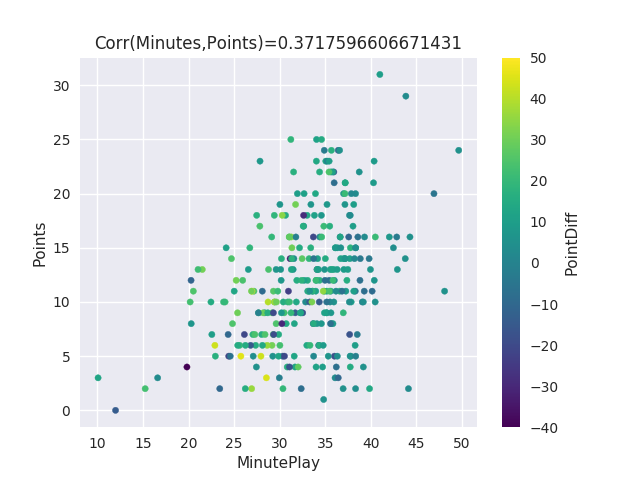

In [6]:
DrayG.plot.scatter('MinutePlay', 'Points', c='PointDiff', colormap='viridis',title='Corr(Minutes,Points)={}'.format(DrayG['MinutePlay'].corr(DrayG['Points'])))

## Are Draymond's minutes or points correlated to how well warriors played? Not really.

<IPython.core.display.Javascript object>


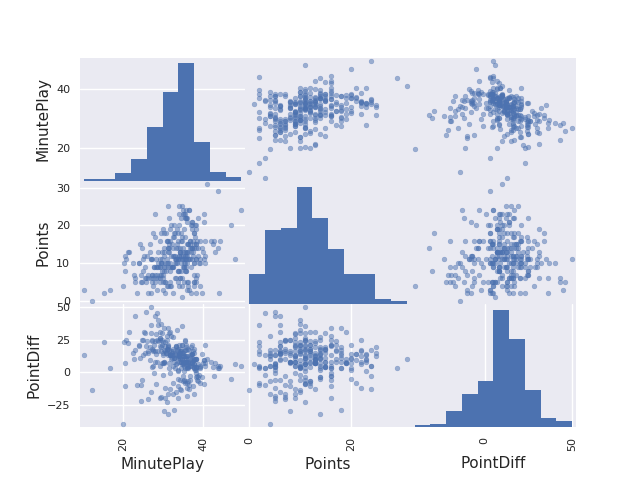

In [7]:
pd.tools.plotting.scatter_matrix(DrayG);

## Zooming in, it' even clearer

<IPython.core.display.Javascript object>


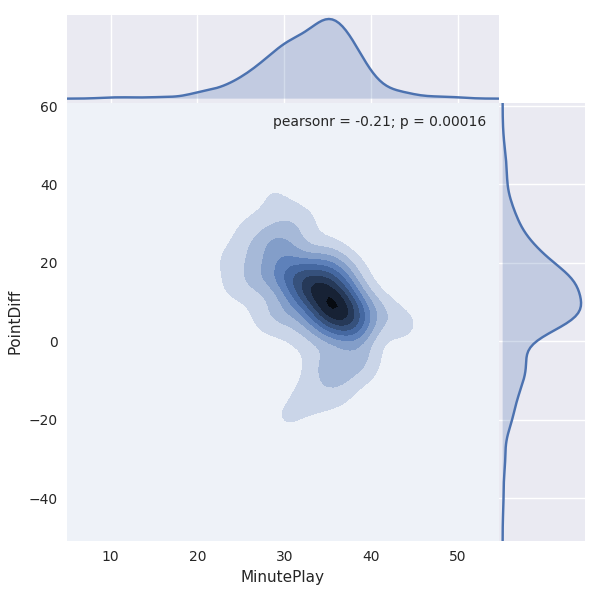

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [8]:
sns.jointplot(DrayG['MinutePlay'], DrayG['PointDiff'],kind='kde', space=0);

<IPython.core.display.Javascript object>


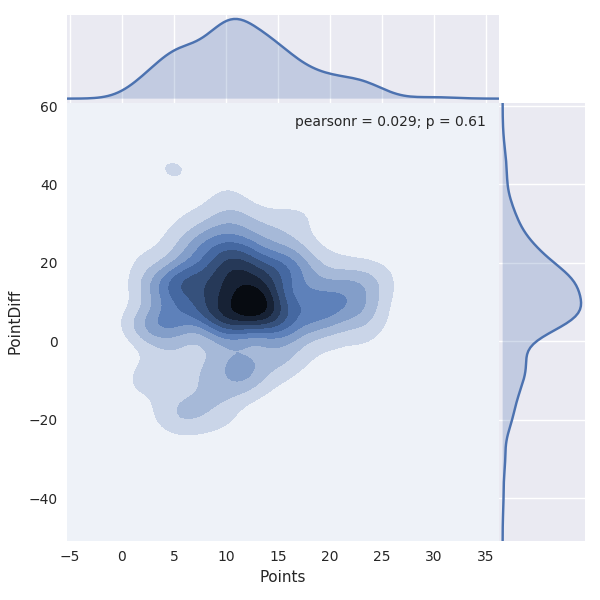

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [9]:
sns.jointplot(DrayG['Points'], DrayG['PointDiff'], kind='kde', space=0);

## Looking at it from a different way, same thing

<IPython.core.display.Javascript object>


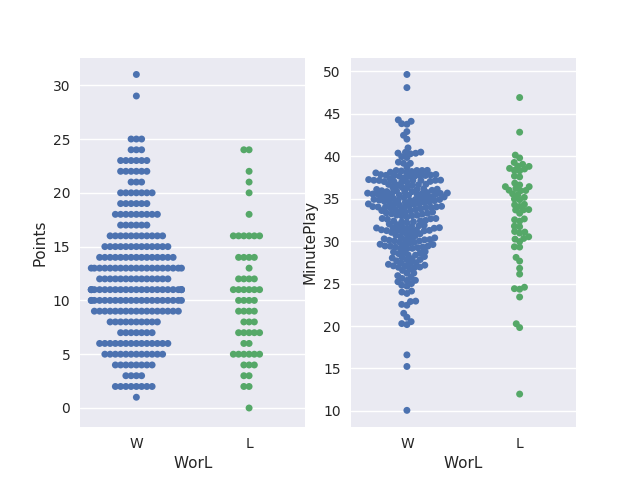

In [20]:
plt.figure()
plt.subplot(121)
sns.swarmplot('WorL', 'Points', data=DrayG);
plt.subplot(122)
sns.swarmplot('WorL', 'MinutePlay', data=DrayG);